## Reverse the direction of beizer curve

In [72]:
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt

def plot_bezier_curve(curve, p1, p2, p3, p4):
    # Adding arrows in the increasing direction of t
    for i in range(0, len(curve), 10):
        plt.arrow(curve[i, 0], curve[i, 1], 
                  curve[i+1, 0] - curve[i, 0], 
                  curve[i+1, 1] - curve[i, 1], 
                  shape='full', lw=0, length_includes_head=True, head_width=0.05)
    plt.plot(curve[:, 0], curve[:, 1], label='Bezier Curve')
    plt.plot([p1[0], p2[0], p3[0], p4[0]], [p1[1], p2[1], p3[1], p4[1]], 'ro-', label='Control Points')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Bezier Curve with Control Points')
    plt.grid(True)
    plt.show()




### Increasing Direction

$$ B(t) = \sum_{i=0}^n \binom{n}{i} (1-t)^{n-i}t^iP_i $$

In [73]:
expr = 0
p1, p2, p3, p4, t = smp.symbols('p1 p2 p3 p4 t')
for i in range(4):
    expr += smp.binomial(3, i) * (1 - t)**(3 - i) * t**i * smp.Matrix([p1, p2, p3, p4])[i]
expr

p1*(1 - t)**3 + 3*p2*t*(1 - t)**2 + p3*t**2*(3 - 3*t) + p4*t**3

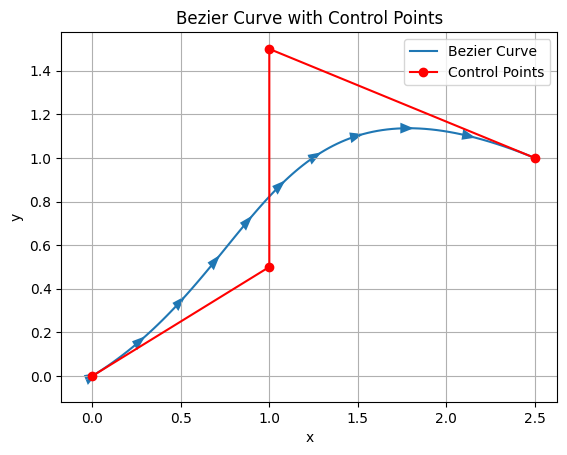

In [74]:
def getBeizer(n,p1,p2,p3,p4):
    t = smp.symbols('t')
    return (1-t)**3*p1 + 3*t*(1-t)**2*p2 + 3*t**2*(1-t)*p3 + t**3*p4

p1 = smp.Matrix([0,0])
p2 = smp.Matrix([1,0.5])
p3 = smp.Matrix([1,1.5])
p4 = smp.Matrix([2.5,1])

beizer = getBeizer(3,p1,p2,p3,p4)
beizer

# Plotting the Bezier curve
t_vals = np.linspace(0, 1, 100)
beizer_func = smp.lambdify(smp.symbols('t'), beizer, 'numpy')
curve = np.array(beizer_func(t_vals))

curve = curve.reshape(2, 100).T
plot_bezier_curve(curve, p1, p2, p3, p4)

#### Decreasing Direction

$$ B(t) = \sum_{i=0}^n \binom{n}{i} t^{n-i}(1-t)^iP_i $$

In [75]:
expr = 0
p1, p2, p3, p4, t = smp.symbols('p1 p2 p3 p4 t')
for i in range(4):
    expr += smp.binomial(3, i) * t**(3 - i) * (1-t)**i * smp.Matrix([p1, p2, p3, p4])[i]
expr

p1*t**3 + 3*p2*t**2*(1 - t) + 3*p3*t*(1 - t)**2 + p4*(1 - t)**3

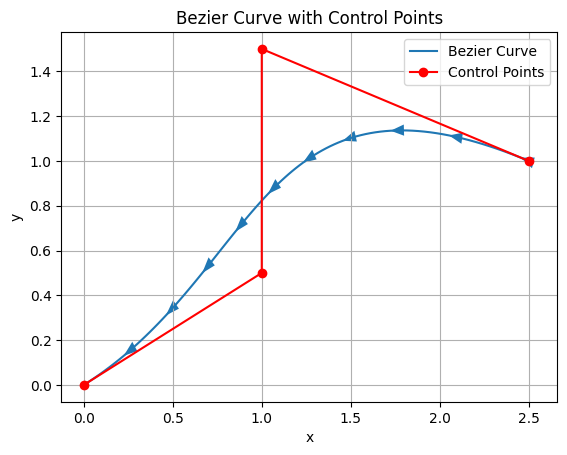

In [76]:
def getBeizer(n,p1,p2,p3,p4):
    t = smp.symbols('t')
    return p1*t**3+3*p2*t**2*(1-t)+3*p3*t*(1-t)**2+p4*(1-t)**3

p1 = smp.Matrix([0,0])
p2 = smp.Matrix([1,0.5])
p3 = smp.Matrix([1,1.5])
p4 = smp.Matrix([2.5,1])

beizer = getBeizer(3,p1,p2,p3,p4)
beizer

# Plotting the Bezier curve
t_vals = np.linspace(0, 1, 100)
beizer_func = smp.lambdify(smp.symbols('t'), beizer, 'numpy')
curve = np.array(beizer_func(t_vals))

curve = curve.reshape(2, 100).T
plot_bezier_curve(curve, p1, p2, p3, p4)